In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *
plt.style.use('default')

from tqdm import tqdm
import pickle
RESULT_DIR = "../../ExptsEval"

from timeit import default_timer
from sklearn.datasets import make_blobs




In [2]:
# function to extract data for N = 10000 from the two sets of saved results  

def extractData4(N_list,K,D_list, model):

    df = pd.DataFrame(np.zeros((len(D_list)*len(N_list),6)), columns=['n','k','d','time','constrs','optgap'])

    
    i = 0
    cnt_list = 0

    for D in D_list:
        # print(K,D)



        with open(os.path.join(RESULT_DIR, 'SynCompare_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:
            
            metrics_list_2 = pickle.load(inp)
            time_list_2 = pickle.load(inp)
            constrsCnt_list_2 = pickle.load(inp)
            optgap_list_2 = pickle.load(inp)
            optVal_list = pickle.load(inp)
            weights_list = pickle.load(inp)
            bias_list = pickle.load(inp)

        # df.iloc[i,2] = np.array(metrics_list_2)[2,2]
        for j, N in enumerate(N_list):
            # print(N,df)
            df.iloc[i,0] = N
            df.iloc[i,1] = K
            df.iloc[i,2] = D
            df.iloc[i,3] = time_list_2[j]
            df.iloc[i,4] = constrsCnt_list_2[j]
            df.iloc[i,5] = optgap_list_2[j]
            i+=1




    return df


In [4]:
N_list = [100 , 315, 1000, 3150, 10000]
K = 2
D_list = [1,2,5] 
model = 'clsvr'
df = extractData4(N_list,K,D_list, model)

100%|██████████| 3/3 [00:00<00:00, 54.35it/s]


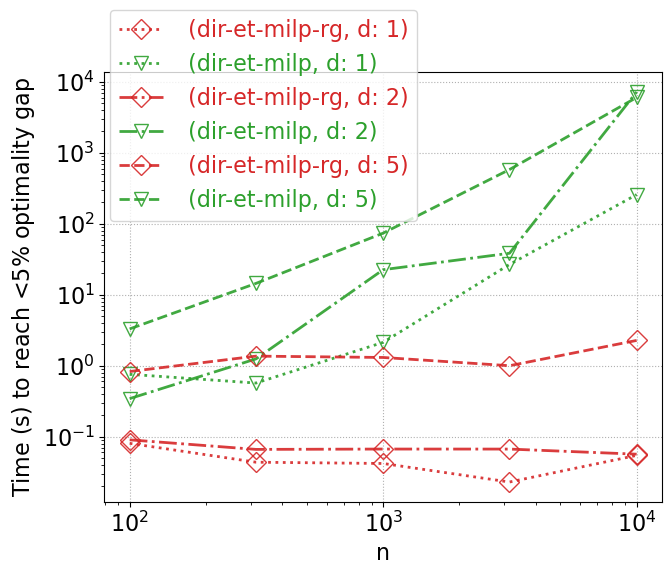

In [12]:
plt.rcParams.update({'font.size': 16})
style1 = [':','-.','--']

# cmap1 = sns.color_palette("rocket_r", n_colors=3)
# cmap2 = sns.color_palette("dark:#5A9_r", n_colors=3)

cmap1 = "C03"
cmap2 = "C02"
fig, ax = plt.subplots(1, 1, figsize = (7,6), sharey = False, sharex=True)


for i, D in enumerate(tqdm(D_list)):


    cols = ['clsvr', 'fullmilp'  ]


    for j, model in enumerate(cols):
        df = extractData4(N_list,K,D_list, model)
        df_plot = df[(df.d == D)]    
        if j == 0:
            df_plot.plot(x = 'n', y = 'time', marker = markers[j], fillstyle = 'none', color=cmap1, ax = ax, markersize = 10, alpha = 0.9, linewidth = 2,legend = False,style=style1[i])
        else:
            df_plot.plot(x = 'n', y = 'time', marker = markers[j], fillstyle = 'none', color=cmap2, ax = ax, markersize = 10, alpha = 0.9, linewidth = 2,legend = False,style=style1[i])


ax.set_ylabel('Time (s) to reach <5$\%$ optimality gap')

ax.set_xlabel('n')

ax.grid(True,linestyle = ':')

ax.set_xscale("log")
ax.set_yscale("log")

# fig.legend([' (k: 2, d: 1)',' (k: 2, d: 2)',' (k: 2, d: 5)',' (k: 2, d: 8)',' (k: 3, d: 1)',' (k: 3, d: 2)',' (k: 5, d: 1)',' (k: 5, d: 2)'],loc = 'upper center',ncol=4,fontsize = 16)#,bbox_to_anchor=[0.38, 0.57])
# fig.legend([' (dir-et-milp-rg, d: 1)',' (dir-et-milp, d: 1)',' (dir-et-milp-rg, d: 2)',' (dir-et-milp, d: 2)',' (dir-et-milp-rg, d: 5)',' (dir-et-milp, d: 5)'],loc = 'upper center',ncol=3,fontsize = 16)#,bbox_to_anchor=[0.38, 0.57])

leg = plt.legend([' (dir-et-milp-rg, d: 1)',' (dir-et-milp, d: 1)',' (dir-et-milp-rg, d: 2)',' (dir-et-milp, d: 2)',' (dir-et-milp-rg, d: 5)',' (dir-et-milp, d: 5)'],
                    bbox_to_anchor=(-0.01, 0.9), loc="center left", ncol = 1)
# leg = plt.legend(loc='upper center')
for i, text in enumerate(leg.get_texts()):
    if i%2 == 0:
        text.set_color("C03")
    else:
        text.set_color("C02")


plt.title("\n")

fig.tight_layout(h_pad = 3)

plt.savefig(f'{RESULT_DIR}/ComparePlot.pdf', bbox_inches = 'tight')
plt.show()